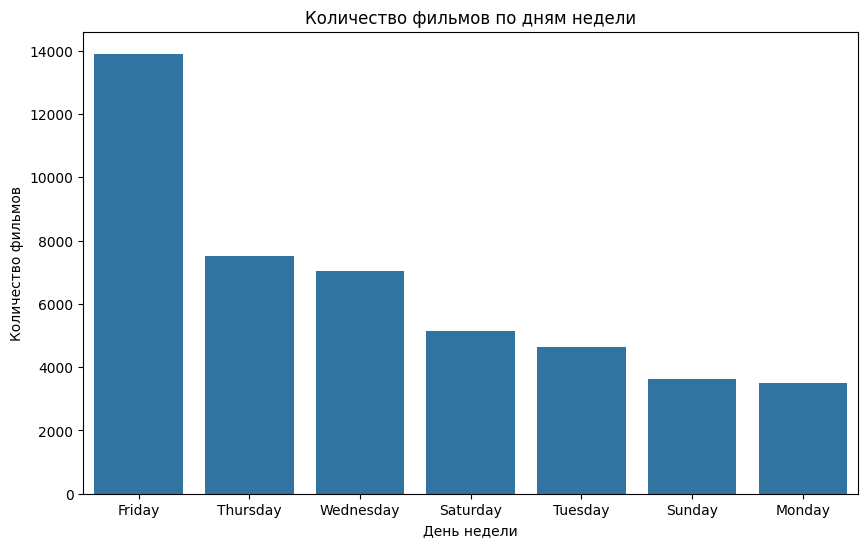

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26494 (\N{CJK UNIFIED IDEOGRAPH-677E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40857 (\N{CJK UNIFIED IDEOGRAPH-9F99}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38534 (\N{CJK UNIFIED IDEOGRAPH-9686}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

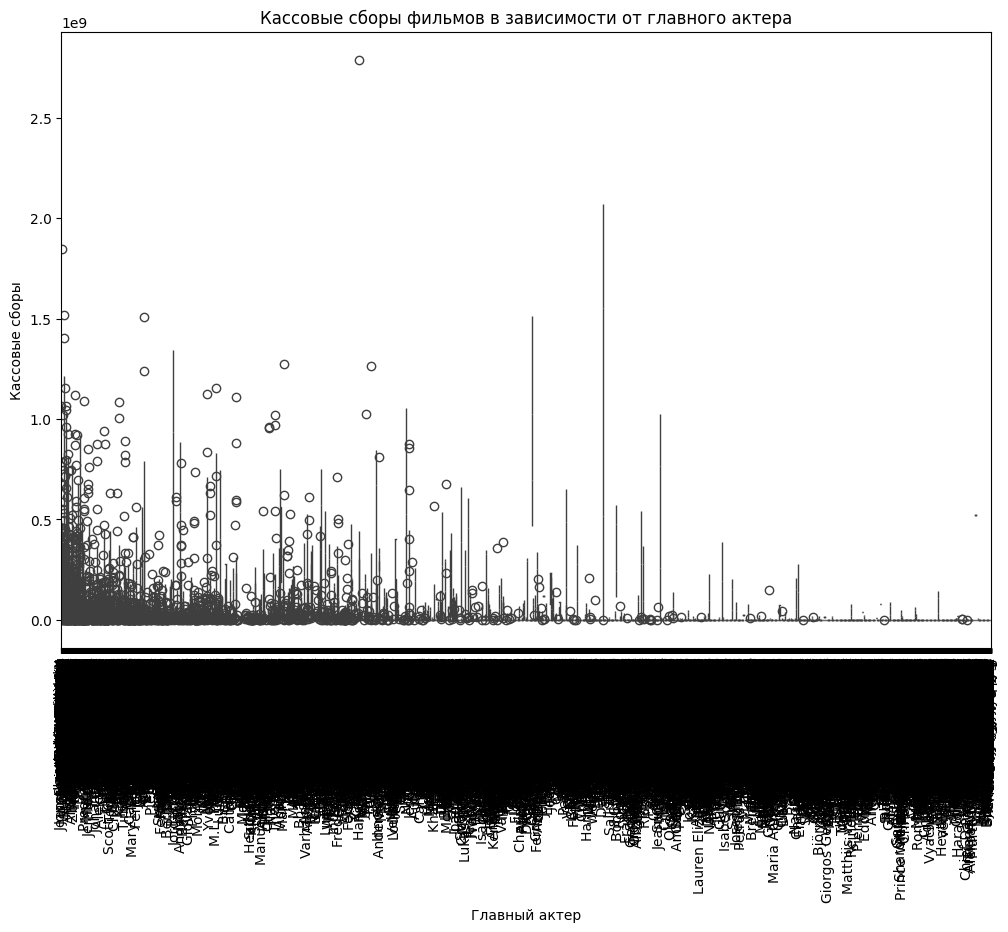

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26494 (\N{CJK UNIFIED IDEOGRAPH-677E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40857 (\N{CJK UNIFIED IDEOGRAPH-9F99}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38534 (\N{CJK UNIFIED IDEOGRAPH-9686}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

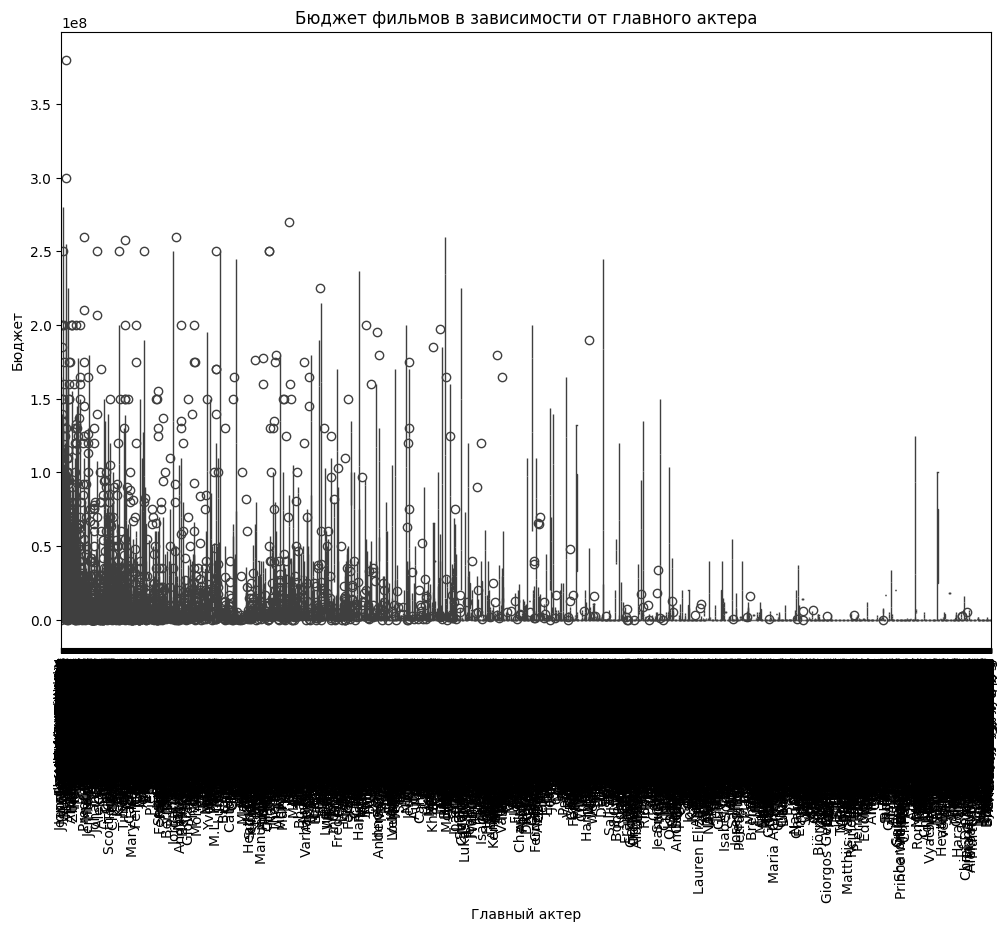

In [ ]:
#
#Решение
#
#
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from ast import literal_eval
import requests
import io

# Ссылка на файл
url = 'https://storage.yandexcloud.net/academy.ai/the_movies_dataset.zip'

# Загрузка файла
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Распаковка файла
zip_file.extractall('/content/the_movies_dataset')

# Загрузка данных о фильмах
movies = pd.read_csv('/content/the_movies_dataset/movies_metadata.csv', low_memory=False)

# Загрузка данных о кассовых сборах
credits = pd.read_csv('/content/the_movies_dataset/credits.csv')

# Приведение столбца 'id' в обоих DataFrame к типу int64
movies['id'] = pd.to_numeric(movies['id'], errors='coerce').astype('Int64')
credits['id'] = pd.to_numeric(credits['id'], errors='coerce').astype('Int64')

# Предобработка данных
# Преобразуем столбец 'release_date' в формат даты
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Создаем столбец с днями недели
movies['release_day'] = movies['release_date'].dt.day_name()

# Преобразуем столбец 'budget' в числовые значения
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')

# Преобразуем столбец 'revenue' в числовые значения
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')

# Гипотеза 1: Большинство фильмов выпускаются по пятницам
# Подсчет количества фильмов, выпущенных по дням недели
release_day_counts = movies['release_day'].value_counts()

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=release_day_counts.index, y=release_day_counts.values)
plt.title('Количество фильмов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество фильмов')
plt.show()

# Гипотеза 2: Известные актеры снимаются в самых кассовых фильмах
# Объединяем данные о фильмах и актерах
movies_with_credits = pd.merge(movies, credits, left_on='id', right_on='id')

# Преобразуем столбец 'cast' в список актеров
movies_with_credits['cast'] = movies_with_credits['cast'].apply(literal_eval)

# Создаем столбец с главным актером
movies_with_credits['main_actor'] = movies_with_credits['cast'].apply(lambda x: x[0]['name'] if len(x) > 0 else None)

# Построение графика зависимости кассовых сборов от главного актера
plt.figure(figsize=(12, 8))
sns.boxplot(x='main_actor', y='revenue', data=movies_with_credits.dropna(subset=['main_actor', 'revenue']))
plt.title('Кассовые сборы фильмов в зависимости от главного актера')
plt.xlabel('Главный актер')
plt.ylabel('Кассовые сборы')
plt.xticks(rotation=90)
plt.show()

# Гипотеза 3: Известные актеры снимаются в самых дорогих фильмах
# Построение графика зависимости бюджета фильма от главного актера
plt.figure(figsize=(12, 8))
sns.boxplot(x='main_actor', y='budget', data=movies_with_credits.dropna(subset=['main_actor', 'budget']))
plt.title('Бюджет фильмов в зависимости от главного актера')
plt.xlabel('Главный актер')
plt.ylabel('Бюджет')
plt.xticks(rotation=90)
plt.show()